In [1]:
from lane_processing.perspective import perspective_transform
from lane_processing.pipeline import pipeline, create_lane_mask, lane_extraction
from lane_processing.calibrate_cam import undistort

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

In [2]:
image_path = 'lane_processing/test_images_color/output8.png'
image = mpimg.imread(image_path)

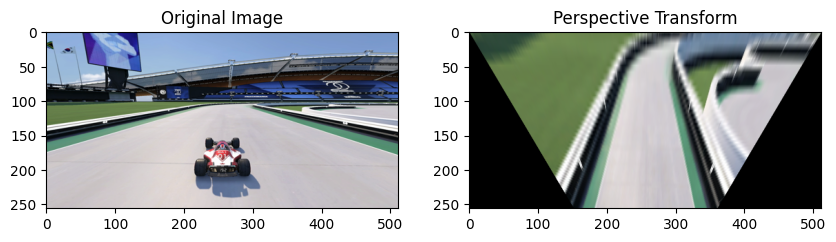

In [3]:
# test perspective_transform
image_warped, _, _  = perspective_transform(image)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title(f"Perspective Transform")
plt.imshow(image_warped)

plt.show()

In [4]:
# 1. generate the lane mask
mask_lane = create_lane_mask(image, max_val=1.0)

# 2. transform the perspective
mask_transformed, _, _ = perspective_transform(mask_lane, None, None)

print(mask_lane.shape, type(mask_lane))
print(mask_transformed.shape, type(mask_transformed))

# 3. generate the lane prediction from the frame and lane_mask
dx, lane_img = lane_extraction(mask_transformed, image)

print(dx)

(256, 512) <class 'numpy.ndarray'>
(256, 512) <class 'numpy.ndarray'>
2.4202280822915205


In [5]:
# 1. generate the lane mask
mask_lane = create_lane_mask(image, max_val=1.0)

# NO STEP 2.

# 3. generate the lane prediction from the frame and lane_mask
dx, lane_img = lane_extraction(mask_transformed, image)

print(dx)

2.4202280822915205


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


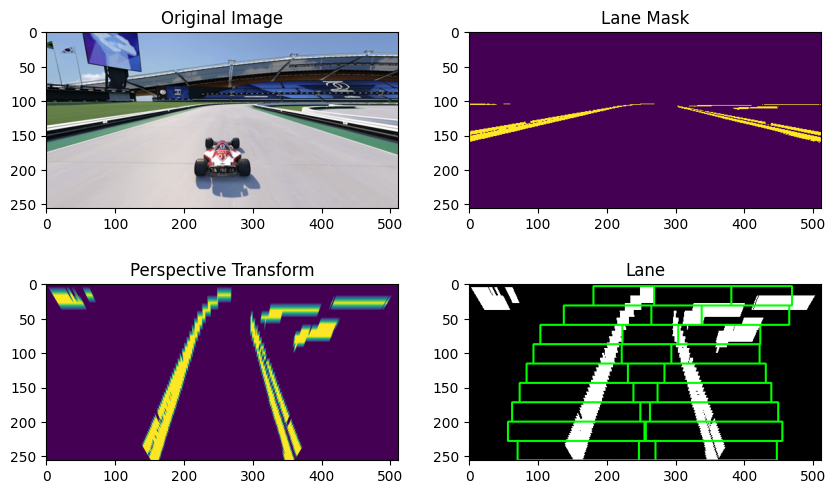

In [6]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(image)

plt.subplot(2, 2, 2)
plt.title(f"Lane Mask")
plt.imshow(mask_lane)

plt.subplot(2, 2, 3)
plt.title(f"Perspective Transform")
plt.imshow(mask_transformed)

plt.subplot(2, 2, 4)
plt.title(f"Lane")
plt.imshow(lane_img)

plt.show()

In [7]:
def frame_wrapper(get_frame, time):
    frame = get_frame(time)
    dx, processed_frame = pipeline(frame)
    return processed_frame

In [10]:
from moviepy import VideoFileClip

video_input_path = "./lane_processing/video/20s.mp4"
video_output_path = "./lane_processing/output_videos/mask3.mp4"

original_clip = VideoFileClip(video_input_path).subclipped(10,16)
video_clip = original_clip.transform(func=frame_wrapper)
# display_in_notebook(
#     clip=video_clip,
#     width=300,
#     autoplay=1
# )
video_clip.write_videofile(video_output_path, audio=False)

frame_index:   1%|          | 2/180 [02:53<00:58,  3.04it/s, now=None]

MoviePy - Building video ./lane_processing/output_videos/mask3.mp4.
MoviePy - Writing video ./lane_processing/output_videos/mask3.mp4



frame_index:   1%|          | 2/180 [04:53<00:58,  3.04it/s, now=None]

MoviePy - Done !
MoviePy - video ready ./lane_processing/output_videos/mask3.mp4
